# Real Estate Price Predictor

In [57]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Data.csv")

In [3]:
dataset.head()  #the .head() function displays the first 5 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.info()  #helpful to find some useful information about the dataset. Esp, if there is any missing value or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
dataset['CHAS'].value_counts()  #displays the number of 0s and 1s in binary categorical data

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283554,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705634,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.883000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
"""
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15)) 
#plt.show must be included for other IDEs
"""

'\n%matplotlib inline\nimport matplotlib.pyplot as plt\ndataset.hist(bins=50, figsize=(20,15)) \n#plt.show must be included for other IDEs\n'

## Train-Test splitting

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [9]:
print(len(train_set))
print(len(test_set))

404
102


In [10]:
#Applying stratified shuffle split so as to ensure that all the values are 'uniformly' distributed. Esp in case of CHAS 
from sklearn.model_selection import StratifiedShuffleSplit
spl=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in spl.split(dataset, dataset['CHAS']):
    strat_train_set=dataset.loc[train_index]
    strat_test_set=dataset.loc[test_index]

In [11]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [12]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [13]:
dataset=strat_train_set.copy()  #all the following preprocessing will now take place only on the train set

# Looking for correlations

In [14]:
corr_matrix=dataset.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679639
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

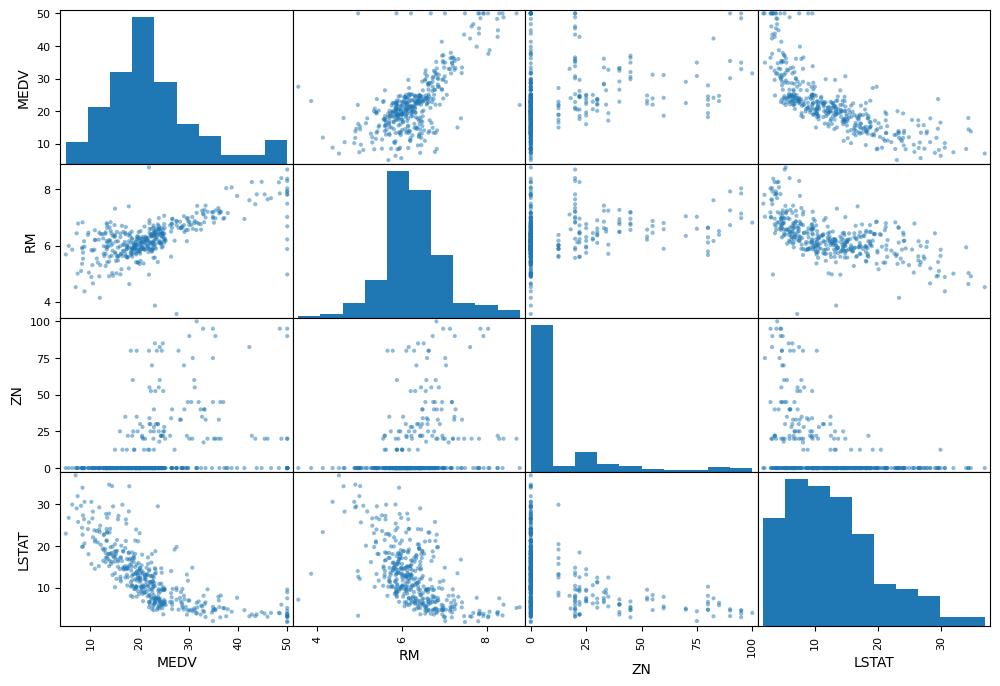

In [15]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "ZN","LSTAT"]
scatter_matrix(dataset[attributes], figsize=(12,8))

In [16]:
#from the above figures, it is obvious that RM and MEDV has a high positive correlation and LSTAT and MEDV has a high negative correlation

<Axes: xlabel='RM', ylabel='MEDV'>

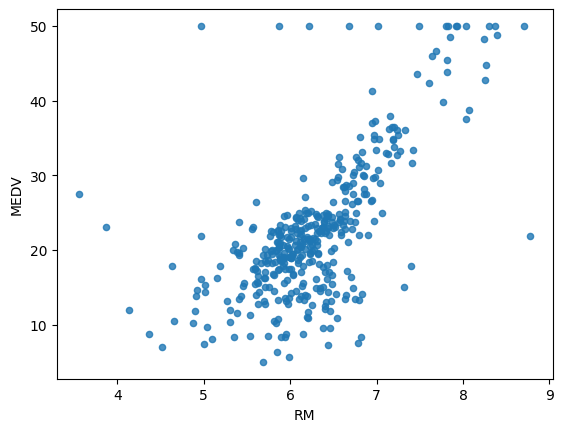

In [17]:
dataset.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8) #The outliers can be removed to get a cleaner dataset

# Trying out attribute combinations

In [18]:
dataset["TAXRM"] = dataset["TAX"]/dataset["RM"]
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [19]:
corr_matrix = dataset.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679639
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525886
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

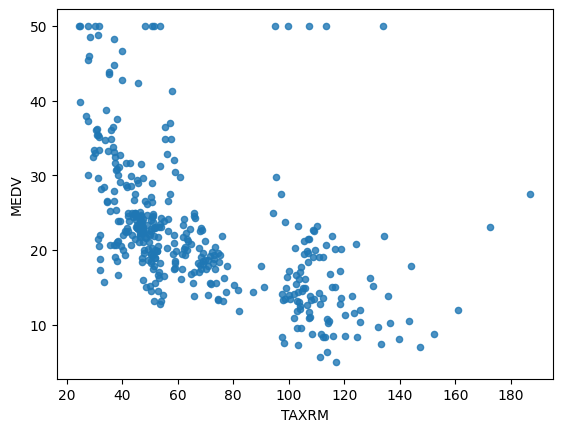

In [20]:
dataset.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [41]:
dataset=strat_train_set.iloc[:,:-1]
dataset_labels=strat_train_set.iloc[:,-1]

# Missing attributes

To get rid of missing values, there are 3 options
  - 1. Get rid of the missing data points
  - 2. Get rid of the attribute
  - 3. Set some value (0, mean or median)
- (it will differ for each case, we must carefully identify which option would suit the best for that particular dataset)
- in this case, RM is an important feature in terms of correlation with the price, hence we cannot drop it, and since we have low number of data points, we cannot delete them either, hence the third option is most suitable

In [42]:
#The dataset has been edited (removed some values of RM)

In [43]:
'''
Option 1
dataset.dropna(subset=["RM"])
dataset.shape
'''

'\nOption 1\ndataset.dropna(subset=["RM"])\ndataset.shape\n'

In [44]:
'''
Option 2
dataset.drop("RM", axis=1)
'''

'\nOption 2\ndataset.drop("RM", axis=1)\n'

In [45]:
'''
Option 3
median = dataset["RM"].median()
dataset["RM"].fillna(median)
Can be done by imputation as well
'''

'\nOption 3\nmedian = dataset["RM"].median()\ndataset["RM"].fillna(median)\nCan be done by imputation as well\n'

In [46]:
#To find the median of all columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [47]:
#To fill in the missing values of any column in the dataset with its median
X=imputer.transform(dataset)
dataset_tr=pd.DataFrame(X, columns=dataset.columns)
dataset_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276839,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711720,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

Primarily, there are three types of objects
1. Estimators - Estimates some parameters based on a dataset. Eg. Imputer. It has a fit and transform method. The fit method fits the dataset and calcuates the internal parameters
2. Transformers - transform method takes input and returns output based on the learnings from the fit(). It also has a convinience function called fit_transform() which fits and then transforms
3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It will also gave a score() function that will evaluate the predictions


# Feature Scaling

Two ways:
1. Normalization (Min-Max Scaling): (value-min)/(max-min); sklearn class: MinMaxScaler; range = (0,1)
2. Standardization: (value-mean)/standard_deviation; sklearn class: StandardScaler; range=(-3,3)

# Creating a pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
myPipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [54]:
dataset_num_tr=myPipeline.fit_transform(dataset) #we can use dataset as well instead of dataset_tr because we included imputer in pipeline 
dataset_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting a desired mode

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor(random_state = 0)
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(dataset_num_tr, dataset_labels)

RandomForestRegressor(n_estimators=10, random_state=0)

# Evaluating the model's performance

## Root mean squared method

In [110]:
from sklearn.metrics import mean_squared_error
dataset_pred=model.predict(dataset_num_tr)
mse=mean_squared_error(dataset_labels,dataset_pred)
rmse=np.sqrt(mse)
rmse

1.702499182186745

## Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, dataset_num_tr, dataset_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [112]:
rmse_scores

array([3.00444995, 3.03881355, 4.29589055, 2.65045371, 4.23639115,
       3.93957612, 5.1086231 , 3.2836664 , 5.35742452, 3.60334844])

In [113]:
print("Scores:",rmse_scores)
print("Mean:",rmse_scores.mean())
print("Standard Deviation:",rmse_scores.std())

Scores: [3.00444995 3.03881355 4.29589055 2.65045371 4.23639115 3.93957612
 5.1086231  3.2836664  5.35742452 3.60334844]
Mean: 3.8518637498942225
Standard Deviation: 0.8605827576349769


# Saving the model

In [114]:
from joblib import dump, load
dump(model,'RealEstate.joblib')

['RealEstate.joblib']

# Testing the model on test data

In [121]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = myPipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
#print(final_predictions, list(Y_test))

3.3442344298162805

# Using the model

In [123]:
from joblib import dump, load
import numpy as np
model = load('RealEstate.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([26.64])